<a href="https://colab.research.google.com/github/ginacu/capstone-project-CSD-096/blob/main/MP_Used_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Car Price Prediction**

In [ ]:
! pip install --upgrade "kaleido==0.1.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 MB 9.6 MB/s eta 0:00:00


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Loading and Data Exploration

---------

## Load Data

The dataset is from Kaggle [https://www.kaggle.com/datasets/tunguz/used-car-auction-prices/data]

In [ ]:
# Import dataset
dfcar = pd.read_csv('https://drive.google.com/uc?id=1KfTnuIeppn-b5bdMyIvVVbII_P7m1Tnu', on_bad_lines="skip")
dfcar.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


**Data Dictionary**  
1. Date : The year of production of the cars.  
2. Make : The brand of the car.  
3. Model : The edition of the car of a specific brand.  
4. Trim : The trim levels for a car are just different versions of the model.  
5. Body : The body style of a vehicle refers to the shape and model of a particular car make.  
6. Transmission : The mechanism that moves the power from the engine to the wheels.  
7. VIN : Vehichel identification number.  
8. State : The state in which the car is auctioned.  
9. Condition : The condition of the cars being at the time of auction.  
10. Odometer : The distance the car has travelled since manufactured.  
11. Color : Exterior color of the car.  
12. Interior : Interior color of the car.  
13. Seller : The seller of the car, car dealers.  
14. **mmr : Manhiem Market Report, the market estimated price of the cars. (Target)**
15. sellingprice : The price a car was sold at auctions.  
16. saledate : The date on which the car has been sold.  

## Data Exploration

In [ ]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [ ]:
# Check null values
dfcar.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

1. In total, there are 558,811 entries.
2. The data types are int, float and object, and appear to be in accordance with the columns. However, for the `saledate` column the initial data type is 'object' needs to be changed to datetime.
3. There are 9 features that have Null values, there are `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`. There needs to be follow-up on Data Cleaning.

In [ ]:
# Check duplicated rows
dfcar.duplicated().sum()

0

No duplicated rows.

In [ ]:
# Categorize the features
num = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cat = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

# Set display float format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

dfcar[num].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000,547017.000,558717.000,558811.000,558811.000
mean,2010.039,3.425,68323.196,13769.325,13611.262
std,3.967,0.949,53397.753,9679.875,9749.657
min,1982.000,1.000,1.000,25.000,1.000
25%,2007.000,2.700,28374.000,7100.000,6900.000
50%,2012.000,3.600,52256.000,12250.000,12100.000
75%,2013.000,4.200,99112.000,18300.000,18200.000
max,2015.000,5.000,999999.000,182000.000,230000.000


1. `condition` has a categorical value between 1-5.
2. The value of the `odometer` appears to have a large distance between min and max where the min value is 1 and the max is almost 1 million. Of course, this is something that seems odd. Apart from that, the mean and median values are also very far apart, namely 16,000.
3. Overall, the `mmr` and `sellingprice` values are not very different. However, the min-max and mean-median values are very different.
4. Some columns in the numerical feature also have null values, so they need to be handled at the next stage.

In [ ]:
dfcar[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


1. From the data above, we can see at a glance what values are the top ones, appear frequently, and how many unique values each feature has.
2. For example, Ford is the most popular brand among a total of 96 other brands. Apart from that, the sedan body is also one of the most favorite.
3. Automatic transmission is more sought after by customers than manual by more than 90%.
4. Black dominates both the exterior and interior colors.

----------

# EDA (Exploratory Data Analysis)

-------

## UNIVARIATE ANALYSIS

### Unique Value From Some Features

In [ ]:
# Check unique value 'year'
dfcar['year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983])

All values are appropriate in the form of numbers starting from 1982 to 2015.

In [ ]:
# Check unique value 'make'
dfcar['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

There is a null value in the `make` feature. Apart from that, the value of the `make` column is still too diverse, where there are words with capital letters, all upper case, and all lower case. Therefore, we will change the values to all lowercase in the next stage. The same thing might also happen to other object type features.

In [ ]:
# Check unique value 'trim'
dfcar['trim'].unique()

array(['LX', '328i SULEV', 'T5', ..., 'pure', 'EWB', 'Power Wagon'],
      dtype=object)

The `trim` feature has more than 1000 unique values so only a few of them appear.

### Outliers (year, condition, odometer, MMR, sellingprice)

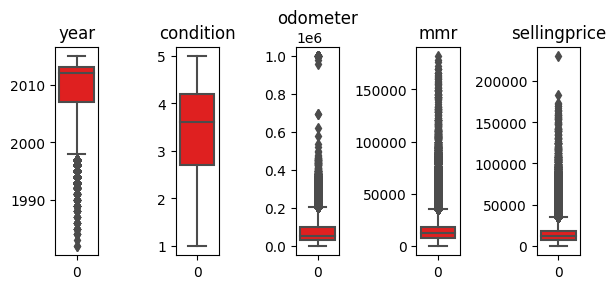

In [ ]:
# Outliers

plt.figure(figsize=(6, 3))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(dfcar[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

It can be seen that `mmr` and `sellingprice` have the most outliers, as do the `odometer` and `year` columns. The quartiles and median also seem far away. This can happen because there is a lot of car data (500k++) so the MMR, selling price and odometer values also vary greatly. The column that looks the most normal is the `condition` column.

### Data Distribution (year, condition, odometer, MMR, sellingprice)

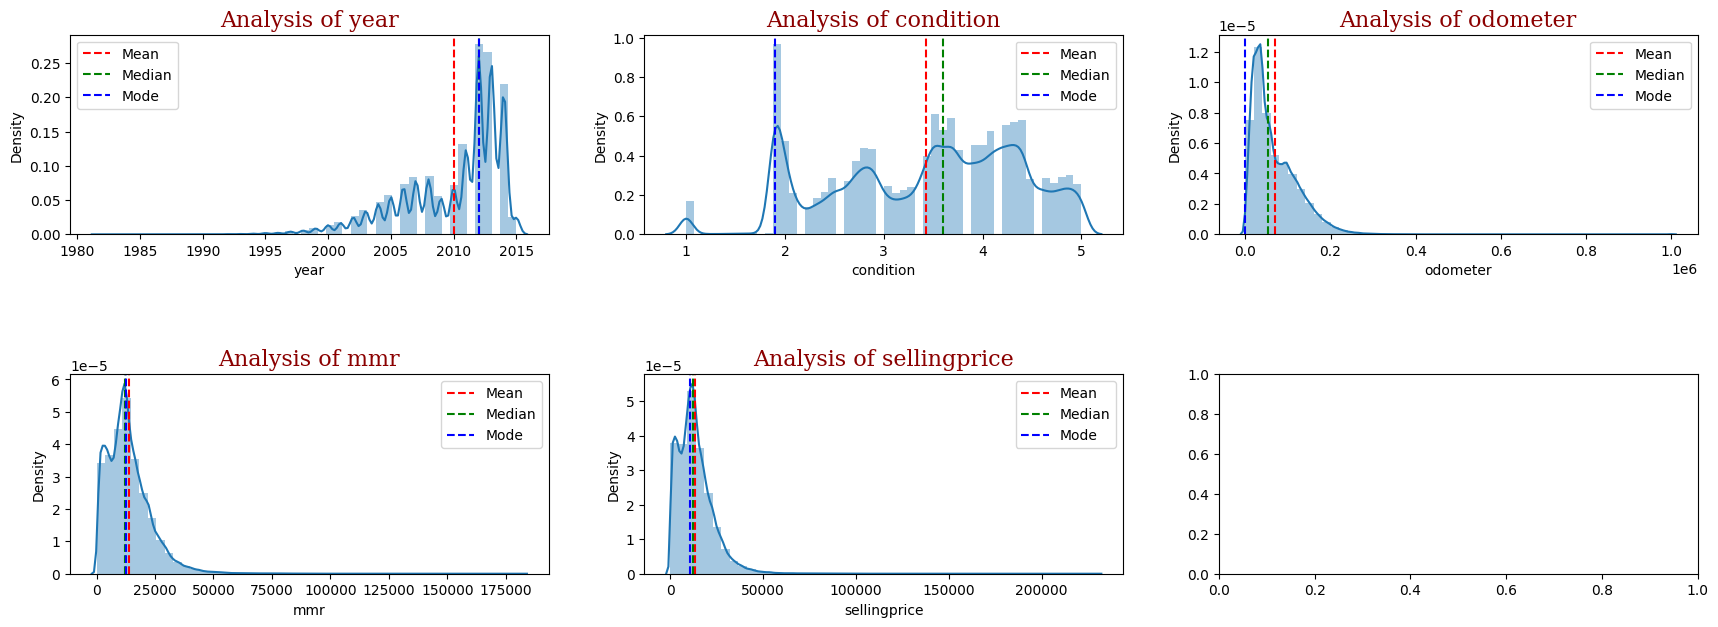

In [ ]:
def generate_distribution_plot(train_df, continuous_features):
    # create copy of dataframe
    data = train_df[continuous_features].copy()
    # Create subplots
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=3,figsize=(21,7))
    fig.subplots_adjust(hspace=0.7)

    # set fontdict
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        sns.distplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='--', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='--', label="Mode")
        ax.legend()
    plt.show()

generate_distribution_plot(dfcar, num)

From the graph above we can conclude:
1. From the `year` column we can see that sales tend to increase every year and peak sales were between 2010 and 2015. We can also see that the `year` column is left-skewed.
2. In the `condition` column, the condition of the car that is in the range of number 2 is the majority of the other conditions. This shows that the condition of the used car isn't good. However, there are quite a few cars in the condition that are rated 3 or above to 4.
3. For the 'odometer', it can be seen that the majority are in the numbers 0 to 0.2, which means the odometer ranges from 0 to 200k. Meanwhile, using cars over 200k is relatively rare.
4. The `mmr` and `sellingprice` columns look similar.
5. The `odometer`, `mmr`, and `sellingprice` columns are right-skewed.

### Checking Abnormal Values

Like the previous analysis where we found min and max values that seemed unreasonable, we will further check the data containing these values.

The columns are `odometer`, `mmr`, and `sellingprice`.

**1. Min and Max From Odometer**

In [ ]:
# Rows with 'odometer' = 1 (min)
min_odo = dfcar[dfcar['odometer'] == 1.000]
min_odo.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
28587,2000,Buick,Regal,GS,Sedan,automatic,2g4wf5516y1172410,pr,NaN,1.000,green,beige,select remarketing group llc/anderson financial,2375,300,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)
41320,1996,Dodge,Intrepid,Base,Sedan,NaN,1b3hd46t9tf153012,mo,NaN,1.000,burgundy,—,elite car sales west inc,550,175,Tue Dec 23 2014 11:00:00 GMT-0800 (PST)
240353,2007,Lexus,ES 350,Base,Sedan,automatic,jthbj46g572137305,ga,3.700,1.000,white,tan,southern auto finance co/ft. lauderdale,19000,15000,Thu Jun 11 2015 03:00:00 GMT-0700 (PDT)


In [ ]:
# Rows with 'odometer' = 999999 (max)
max_odo = dfcar[dfcar['odometer'] == 999999.000]
max_odo.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
513201,2006,Ford,Taurus,SEL,sedan,automatic,1fafp56u06a197709,oh,1.900,999999.000,gray,gray,car now acceptance co/columbus,175,400,Thu Jun 11 2015 02:00:00 GMT-0700 (PDT)
275,2013,Hyundai,Elantra Coupe,GS,Elantra Coupe,automatic,kmhdh6ae8du017422,ca,1.000,999999.000,blue,gray,hyundai motor finance,8025,2500,Tue Jan 27 2015 04:00:00 GMT-0800 (PST)
485594,1997,Mazda,Protege,LX,sedan,automatic,jm1bc141xv0109453,fl,1.000,999999.000,blue,beige,coggin toyota at the avenues,200,325,Thu Jun 04 2015 05:20:00 GMT-0700 (PDT)


From the min and max of the `odometer` column above, it can be seen that the data not only contains min and max values that are far away but other columns are also abnormal. This can be seen from the sample above where the min and max rows also contain many null values, low mmr and selling price values, and poor conditions.

**2. Min from Selling Price**

In [ ]:
# Rows with 'sellingprice' = 1 (min)
min_price = dfcar[dfcar['sellingprice'] == 1.000]
min_price

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
7566,2002,Ford,F-350 Super Duty,XLT,Crew Cab,NaN,1ftsw31f52ed16477,ca,2.000,NaN,white,gray,laa leasing,7850,1,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)
48453,2003,Mercedes-Benz,E-Class,E500,Sedan,automatic,wdbuf70j73a269529,ga,2.100,1.000,black,black,peoples credit company inc,7325,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST)
293223,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew6eda13643,tx,4.100,31886.000,white,gray,u-haul,20800,1,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)
348252,1995,Isuzu,Rodeo,LS,SUV,NaN,4s2cm58v9s4375559,va,1.000,254132.000,red,gray,automotive remarketing inc,375,1,Wed Mar 04 2015 01:05:00 GMT-0800 (PST)


**3. Min from MMR**

In [ ]:
# Rows with 'mmr' = 25 (min)
min_mmr = dfcar[dfcar['mmr'] == 25.000]
min_mmr.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
386755,2002,NaN,NaN,NaN,NaN,NaN,kmhcg35g32u173308,qc,2.200,296901.000,black,gray,auto deall,25,250,Tue Mar 03 2015 02:00:00 GMT-0800 (PST)
440107,2002,Saab,9-5,Arc 3.0t,Sedan,automatic,ys3ed49z623031038,fl,2.100,171964.000,silver,black,courtesy kia of brandon,25,800,Thu May 21 2015 09:20:00 GMT-0700 (PDT)
558168,2003,Saab,9-5,Arc 3.0t,sedan,NaN,ys3ed49z133043714,pa,2.500,189783.000,silver,black,r hollenshead auto sales inc,25,700,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)


From the data above, where the sellingprice is 1 and mmr is $25, there are many null values, the `sellingprice` value is relatively small, and the condition isn't good. This data will be handled later at the data cleansing stage.

## MULTIVARIATE ANALYSIS

### Correlation Heatmap

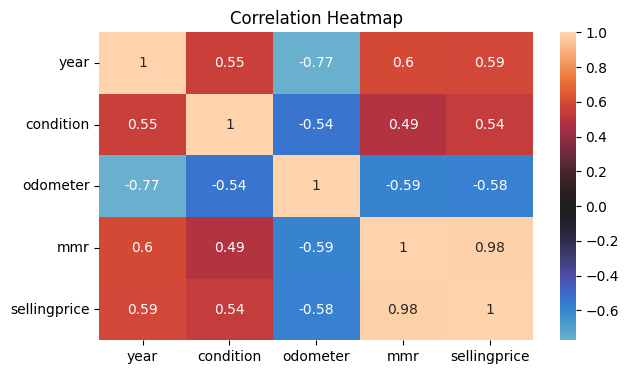

In [ ]:
# Correlation Heatmap
corr_matrix = dfcar.corr()
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, color='blue', center=0)
plt.title('Correlation Heatmap')
plt.show()

1. The correlation between `year` and `sellingprice` is positive, indicating that the newer the car, the higher the selling price.
2. The `condition` column has a positive correlation with `sellingprice`, which means the better the condition of the car, the higher the selling price.
3. The `odometer` column has a negative correlation with `sellingprice`, indicating that the less mileage, the higher the selling price.
4. The `mmr` column has a fairly strong positive correlation with `sellingprice`, indicating that the selling price predicted by MMR has a good correlation with the actual selling price.
5. The 'Year' and 'Odometer' columns also show a fairly high negative correlation, meaning that the latest cars have odometers that tend to be small

### Correlation Between MMR and Selling Price

As the results of the previous analysis where the MMR and Selling Price values are highly similar, we will try to visualize the relationship between them.

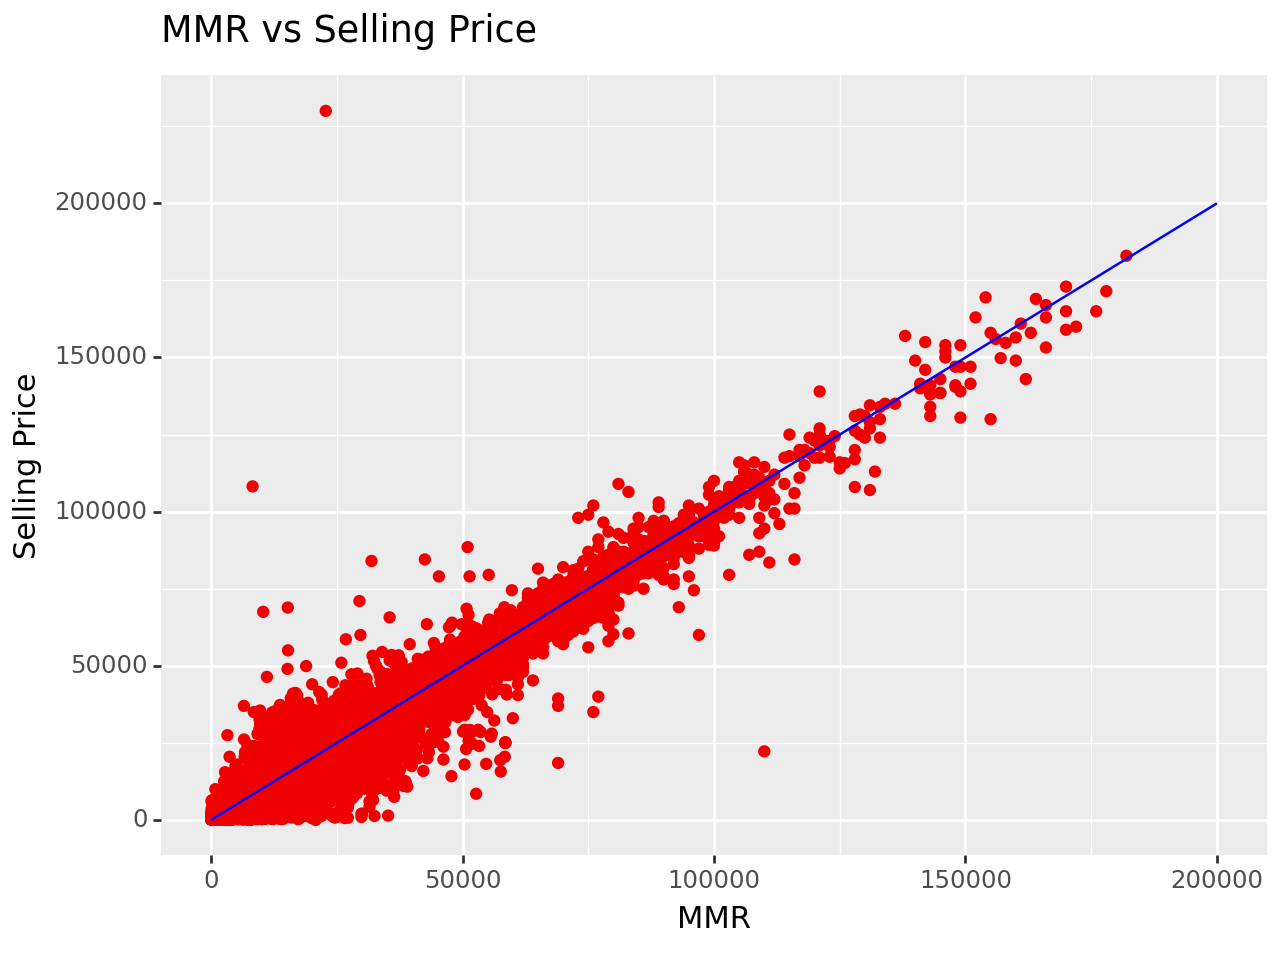

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import *

# MMR and Selling Price
(ggplot(dfcar)
 + aes(x ='mmr', y ='sellingprice')
 + geom_point(color='#f00000')
 + labs(title='MMR vs Selling Price', x='MMR', y='Selling Price')
 + annotate(geom = "segment", x = 0, xend = 200000, y = 0, yend = 200000, color='blue')
)

MMR is an abbreviation for Manhiem Market Report, a specific report which is an indicator of wholesale prices for used vehicles. Price calculations are based on more than 10 million sales transactions over the previous 13 months at exact prices by vehicle sales at Manheim auction houses.
So, it can be said that MMR is worthy of being used as a price reference.

----------

# BUSINESS INSIGHT AND VISUALIZATION

Here are some business insight :  

**1. Pricing from MMR**  

**2. The Growth of Transaction Amount and Number of Transaction**  

**3. Top Brand**  

##1. MMR as the Target
First we will use dataset copy to separate insight mining and modeling.
Then, look at how sales are and divide the car data into 2 categories (based on targets) : Above MMR and Below MMR.

In [ ]:
# Copy dataset
copy = dfcar.copy()

# 'is_sold_below_mmr' (1=Yes, 0=No)
copy['is_sold_below_mmr'] = copy.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)

# Sales Percentage
transaction = copy.groupby('is_sold_below_mmr').agg({'vin':'count'}).rename({'vin':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

,total_transaction,percentage
is_sold_below_mmr,,
0,272386,48.740
1,286425,51.260


In [ ]:
copy.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,is_sold_below_mmr
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.000,16639.000,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.000,9393.000,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.500,1331.000,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),1


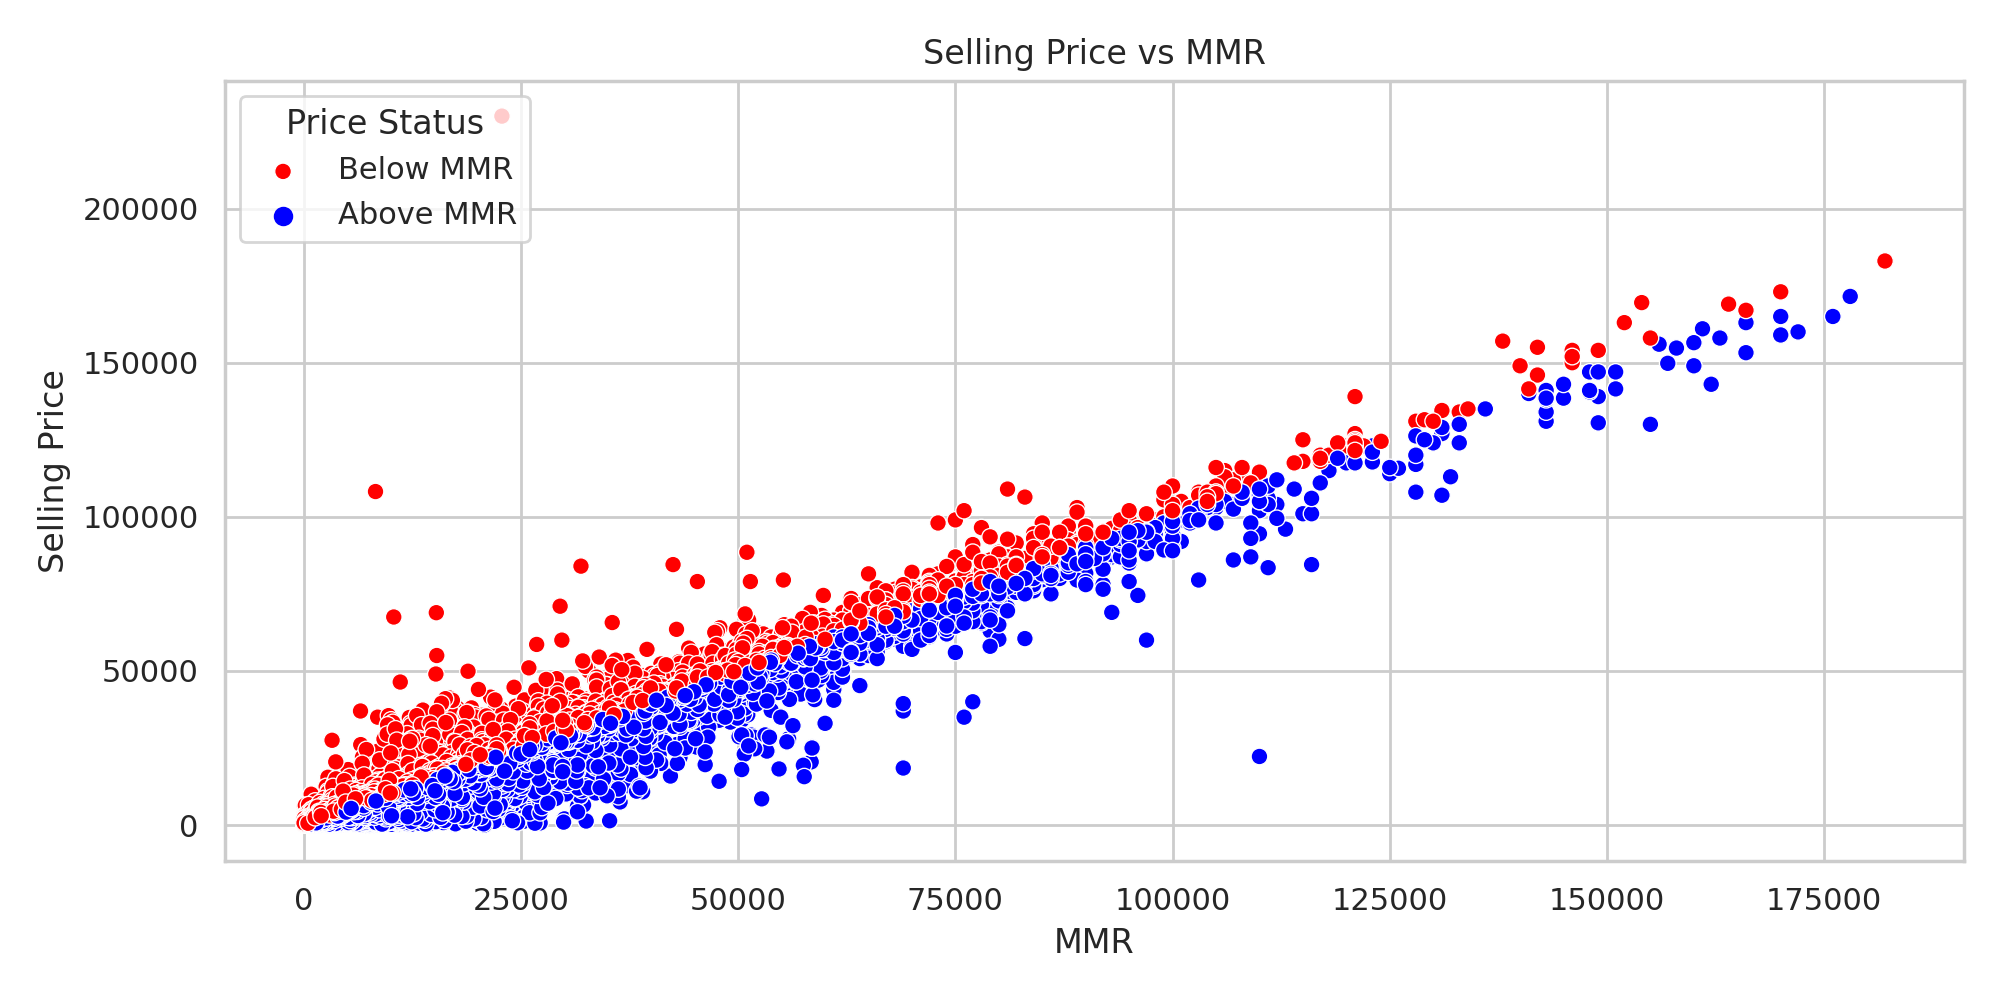

In [ ]:
copy['Price_Status'] = copy['sellingprice'] > copy['mmr']
sns.set(style='whitegrid')

plt.figure(figsize=(10, 5))
sns.scatterplot(data=copy, x='mmr', y='sellingprice', hue='Price_Status', palette={True: 'red', False: 'blue'})
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.title('Selling Price vs MMR')
plt.legend(title='Price Status', loc='upper left', labels=['Below MMR', 'Above MMR'])

plt.tight_layout()
plt.show()

## 2. The Growth of Transaction Amount and Number of Transactions

In [ ]:
# Slicing the saledate
timeget = []
for i in copy['saledate'].str.split():
    time_split = i[:5]
    date_string = ' '.join(time_split)
    timeget.append(date_string)
copy['datetime'] =  pd.to_datetime(timeget)
copy['month_year'] = copy.datetime.dt.strftime('%b-%y')

copy['date'] = copy['datetime'].dt.date
copy['date'] = pd.to_datetime(copy['date'], format = '%Y-%m-%d')

# Grouping monthly sale 'month_year'
monthly_sale_summary = copy.groupby(['month_year']).agg({'vin' : 'count', 'sellingprice' : 'sum'}).reset_index()
monthly_sale_summary.columns = ['Date', 'Total_Transaction', 'Transaction_Amount']
# Sorting Date
custom_dict = {'Jan-14':0, 'Feb-14':1, 'Dec-14':2, 'Jan-15':3, 'Feb-15':4, 'Mar-15':5, 'Apr-15':6, 'May-15':7, 'Jun-15':8, 'Jul-15':9}
monthly_sale_summary = monthly_sale_summary.sort_values(by=['Date'], key=lambda x: x.map(custom_dict))
monthly_sale_summary

,Date,Total_Transaction,Transaction_Amount
4,Jan-14,206,3204525
2,Feb-14,1,10500
1,Dec-14,53520,604434205
5,Jan-15,140609,1868476267
3,Feb-15,163053,2218860327
8,Mar-15,46277,622105273
0,Apr-15,1450,14799755
9,May-15,52451,752215356
7,Jun-15,99944,1499947215
6,Jul-15,1300,22069764


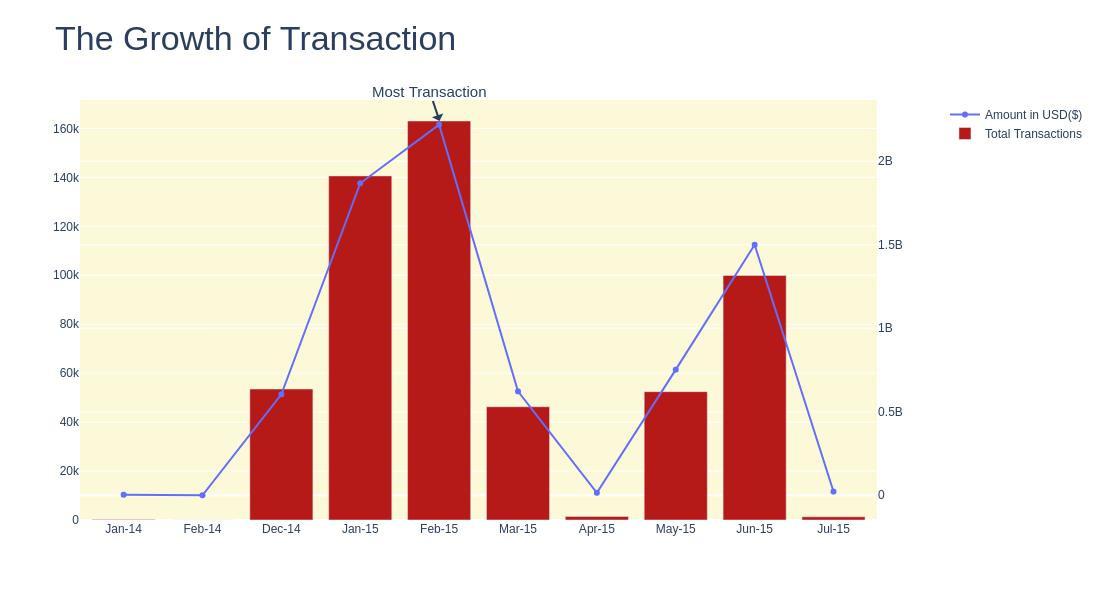

In [ ]:
from plotly.subplots import make_subplots
fig = go.Figure()
trace1 = go.Scatter(x=monthly_sale_summary.Date, y=monthly_sale_summary.Transaction_Amount, name='Amount in USD($)')
trace2 = go.Bar(x=monthly_sale_summary['Date'], y=monthly_sale_summary['Total_Transaction'], marker_color='#b51a18', name='Total Transactions')

fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Transactions")

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1, secondary_y=True)
fig.add_trace(trace2)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.424, y=0.95, text='Most Transaction', font =dict(size=15), showarrow=True, arrowhead=1, arrowsize=1, arrowwidth=2))

fig['layout'].update(height = 600, width = 1100, title = "The Growth of Transaction", title_font_size=34, plot_bgcolor='#fcf9d9', annotations=annotations)
fig.show('png')

The graph above shows that February 2015 was the peak of transactions with a total of around 160k transactions and total revenue of around $2 billion. In contrast to January-February 2014 and also in April and July 2015 with the least transactions.

## 3. Top Brand

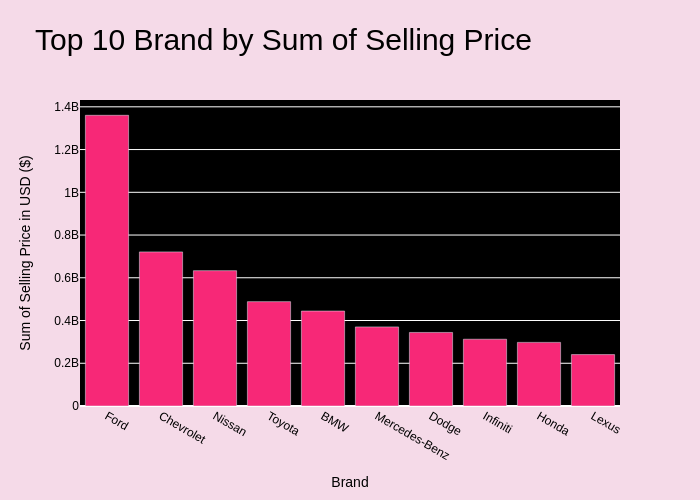

In [ ]:
# Brand
sum_make = copy.groupby('make')['sellingprice'].sum().reset_index()
sum_make = sum_make.sort_values(by='sellingprice', ascending=False)

top_10 = sum_make.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=top_10['make'], y=top_10['sellingprice'], marker_color='#f72877'))
fig.update_layout(title='Top 10 Brand by Sum of Selling Price',
                  title_font_size=30,
                  xaxis_title='Brand',
                  yaxis_title='Sum of Selling Price in USD ($)',
                  plot_bgcolor='black',
                  paper_bgcolor='#f5dae8',
                  font=dict(color='black'))
fig.show('png')

Ford is the most popular brand with total revenues of almost $1.4B, indicating that Ford has a strong market. Then there was a significant decline in the second popular car, Chevrolet. Meanwhile, Chevrolet, Nissan, Toyota, etc. show a constant difference or the gap is not too big.

# Data Preparation

----

## Data Cleansing

### Dropping

**Duplicated Rows**

Pada tahap Data Exploration sebelumnya, terlihat bahwa tidak ada duplicate rows sehingga tidak perlu penanganan.

**Rows with Extreme Values**

Pada tahap EDA sebelumnya, kita menemukan baris-baris yang memiliki outliers ekstrim dan tidak masuk akal. Maka, di tahap data cleaning ini kita akan menghapus baris-baris tersebut.

In [ ]:
dfcar2 = dfcar.copy()

In [ ]:
# Drop nilai min odo
i_min_odo = dfcar2[((dfcar2.odometer == 1.000))].index
dfcar2 = dfcar2.drop(i_min_odo)

In [ ]:
# Drop nilai max odo
i_max_odo = dfcar2[((dfcar2.odometer == 999999.000))].index
dfcar2 = dfcar2.drop(i_max_odo)

In [ ]:
# Drop nilai min sellingprice
i_min_price = dfcar2[((dfcar2.sellingprice == 1.000))].index
dfcar2 = dfcar2.drop(i_min_price)

In [ ]:
# Drop nilai min mmr
i_min_mmr = dfcar2[((dfcar2.mmr == 25.000))].index
dfcar2 = dfcar2.drop(i_min_mmr)

In [ ]:
dfcar2.shape

(557391, 16)

**Irrelevant Features**

Beberapa fitur terlihat kurang relevan dan unique value yang dimiliki terlalu luas seperti yang sudah kita analisis sebelumnya. Sehingga diasumsikan bahwa fitur tersebut tidak memiliki pola tertentu. Fitur tersebut adalah `vin`, `sellingprice`, dan `saledate` yang akan dihapus. Alasannya yaitu :  
a. `vin` bukanlah fitur yang menentukan harga mobil karena hanya berfungsi sebagai idetification number dari mobil.  
b. `sellingprice` memiliki korelasi tinggi (0.98) dengan `mmr` (fitur target).  
c. `saledate` tidak menunjukkan faktor yang cukup signifikan dikarenakan waktu yang terlalu luas dan tidak menentu sehingga tidak ada pola khusus yang mempengaruhi harga jual mobil.

In [ ]:
# Menghapus fitur kurang relevan
dfcar2 = dfcar2.drop(['vin','sellingprice','saledate'], axis=1)
dfcar2.head(3)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.000,16639.000,white,black,"kia motors america, inc",20500
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.000,9393.000,white,beige,"kia motors america, inc",20800
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.500,1331.000,gray,black,financial services remarketing (lease),31900


### Handle Unique Values

Pada beberapa fitur terdapat banyak sekali unique values seperti yang sudah dieksplor sebelumnya. Kita akan menghandle unique values yang tidak seragam tersebut menjadi :  
1. Semua categorical data kecuali saledate akan diubah menjadi lower case untuk mendapatkan value yang bernilai sama.  
2. Nilai " — " pada fitur `color` dan `interior` akan diganti dengan nilai modus, yaitu black.  

In [ ]:
# Fungsi untuk mengubah nama kolom menjadi lowercase
def content_consistent(df):
    cols = df.select_dtypes(object).columns.difference(['saledate'])
    df[cols] = df[cols].apply(lambda x: x.str.lower())
    return df

dfcar2 = content_consistent(dfcar2)

In [ ]:
import re

# Replace color and interior
dfcar2['color'].replace('—','black',inplace=True)
dfcar2['interior'].replace('—','black',inplace=True)

# Replace model dan trim dgn menghilangkan special chars
dfcar2['model'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)
dfcar2['trim'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)
dfcar2['seller'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)

# Replace same meaning of value
dfcar2['make'].replace('landrover','land rover',inplace=True)
dfcar2['make'].replace('mercedes-b','mercedes-benz',inplace=True)
dfcar2['make'].replace('mercedes','mercedes-benz',inplace=True)
dfcar2['make'].replace('vw','volkswagen',inplace=True)
dfcar2['make'].replace('ford tk','ford truck',inplace=True)
dfcar2['body'].replace('koup','coupe',inplace=True)
dfcar2['body'].replace('regular-cab','regular cab',inplace=True)
dfcar2['body'].replace('xtracab','extended cab',inplace=True)

In [ ]:
# Melihat hasil penanganan inkonsistensi value dan kolom
c = ['make', 'model', 'trim', 'body', 'color', 'interior', 'state', 'seller']

dfcar2[c].describe()

,make,model,trim,body,color,interior,state,seller
count,547162,547064,546817,544286,556662,556662,557391,557391
unique,61,841,1883,42,19,16,38,14152
top,ford,altima,base,sedan,black,black,fl,nissaninfiniti lt
freq,93834,19322,55641,240696,135399,260895,82780,19691


Setelah dilakukan pembersihan data dengan menyamaratakan penulisan string, maka terlihat hasilnya dimana:  
a. `make` yang awalnya 96 kini hanya 61 unique values  
b. `model` yang awalnya 973 kini hanya 841 unique values  
c. `trim` yang awalnya 1975 kini hanya 1883 unique values  
d. `body` yang awalnya 86 kini hanya 42 unique values   
e. `seller` yang awalnya 14264 kini hanya 14152 unique values  
f. `color` dan `interior` berkurang 1 nilai dari unique value sebelumnya dikarenakan sudah digantikan oleh nilai modus (black).  
g. `state` adalah satu-satunya yang masih bernilai sama.

### Handle Missing Values

Terdapat 9 fitur yang memiliki Null value, yaitu `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`.

Namun, dikarenakan fitur color dan interior telah dihapus, maka kita hanya perlu meng-handle fitur lainnya.  
1. Seluruh categorical data akan diisi dengan nilai modus.  
2.  `condition` yang memiliki persebaran data yang lumayan normal, maka akan diisi dengan nilai mean.
3. `odometer` yang hanya memiliki 94 null values, kita akan menghapusnya.

In [ ]:
# Imputasi null value dengan mode
mode_value = dfcar2.filter(['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']).mode()
cols = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']

dfcar2[cols] = dfcar2[cols].fillna(dfcar2.mode().iloc[0])

In [ ]:
# Imputasi null value dengan mean
dfcar2['condition'] = dfcar2['condition'].fillna(dfcar2['condition'].mean())

In [ ]:
# Menghapus sisa null value
dfcar2.dropna(axis=0, inplace=True)
dfcar2.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
dtype: int64

### Handle Outliers

In [ ]:
df_clean = dfcar2.copy()

In [ ]:
# Fungsi untuk mengecek outlier
def outlier_del(df, column, mode):
    q1 = df.iloc[:,column].quantile(0.25)
    q3 = df.iloc[:,column].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - (1.5 * iqr)
    upper_tail = q3 + (1.5 * iqr)
    nama_kolom = df.columns[column]
    jumlah_outliers = df[(df.iloc[:,column] <= lower_tail)|(df.iloc[:,column] >= upper_tail)].iloc[:,column].count()
    total_row = df.iloc[:,column].count()
    persentase_outliers = round(((jumlah_outliers/total_row)*100),2)
    if mode == 'summary':
        return print('Jumlah Outliers pada kolom ', nama_kolom, ' :', jumlah_outliers, ' dan persentase outliers:', persentase_outliers, '%')
    elif mode == 'df':
        return df[(df.iloc[:,column] >= lower_tail)&(df.iloc[:,column] <= upper_tail)]
    else :
        return print('periksa mode yang diinputkan')

In [ ]:
# Memeriksa presentase outlier setiap kolom
column = [0, 7, 8, 12]

for i in range(0, len(column)):
    outlier_del(df_clean, column[i], 'summary')

Jumlah Outliers pada kolom  year  : 6025  dan persentase outliers: 1.08 %
Jumlah Outliers pada kolom  condition  : 0  dan persentase outliers: 0.0 %
Jumlah Outliers pada kolom  odometer  : 10270  dan persentase outliers: 1.84 %
Jumlah Outliers pada kolom  mmr  : 16307  dan persentase outliers: 2.93 %


In [ ]:
# Menghapus outliers
df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar2, 0, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar2, 8, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar2, 12, 'df').reset_index()['index'])]
df_clean.shape

(527806, 13)

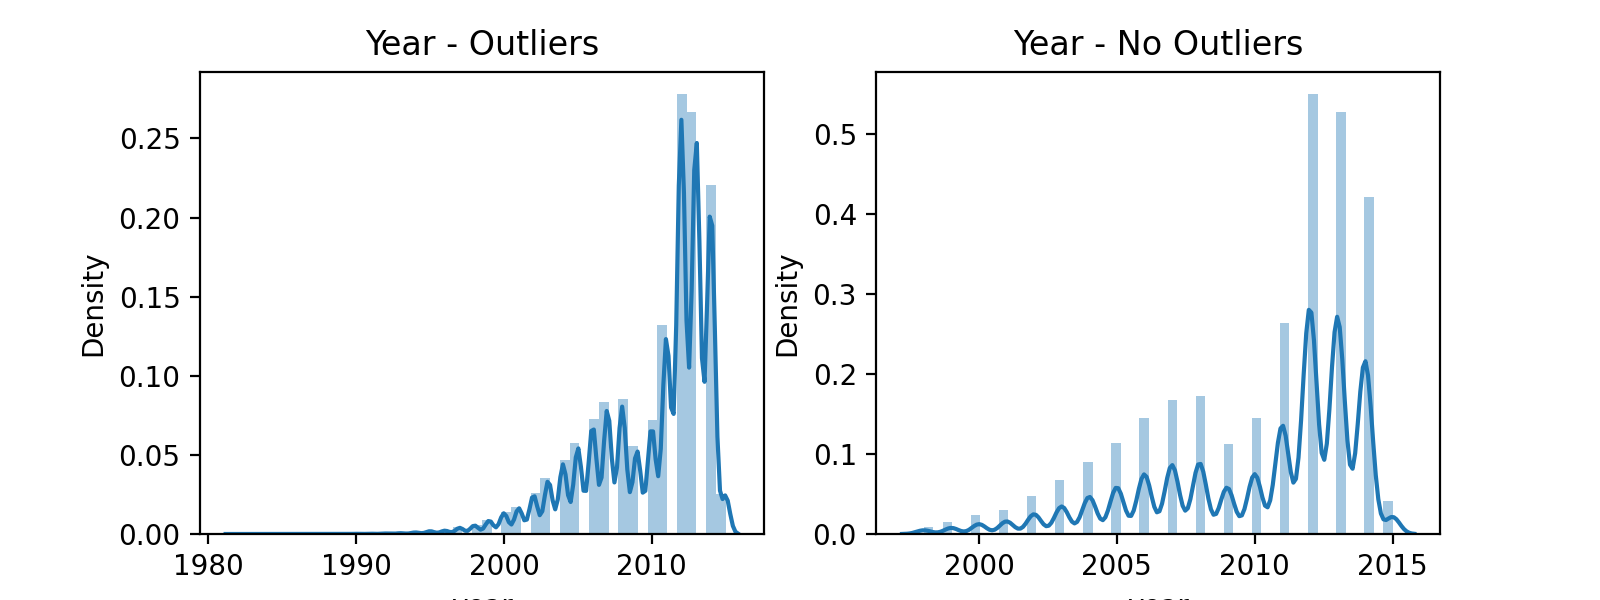

In [ ]:
# Membuat Plot Untuk Membandingkan dengan kondisi sebelum penghapusan outlier
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar2.year)
plt.title('Year - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.year)
plt.title('Year - No Outliers')
plt.show()

In [ ]:
# Mengukur skewness sebelum dihandle outlier
print(f"Koefisien Skewness Awal year : {round(dfcar2.year.skew(), 3)}")

# Mengukur skewness setelah dihandle outlier
print(f"Koefisien Skewness Baru year : {round(df_clean.year.skew(), 3)}")

Koefisien Skewness Awal year : -1.186
Koefisien Skewness Baru year : -1.017


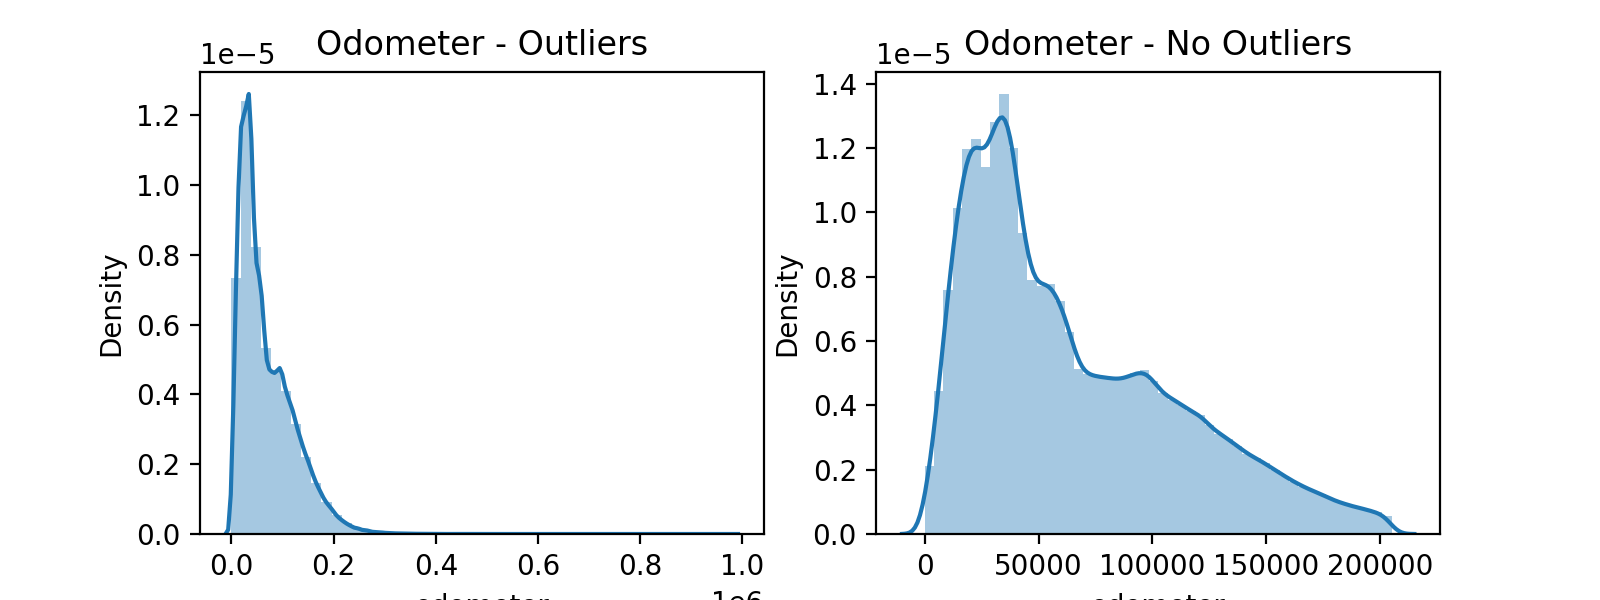

In [ ]:
# Visualisasi hasil penghapusan outlier
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar2.odometer)
plt.title('Odometer - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.odometer)
plt.title('Odometer - No Outliers')
plt.show()

In [ ]:
# Mengukur skewness sebelum dihandle outlier
print(f"Koefisien Skewness Awal odometer : {round(dfcar2.odometer.skew(), 3)}")

# Mengukur skewness setelah dihandle outlier
print(f"Koefisien Skewness Baru odometer : {round(df_clean.odometer.skew(), 3)}")

Koefisien Skewness Awal odometer : 1.236
Koefisien Skewness Baru odometer : 0.841


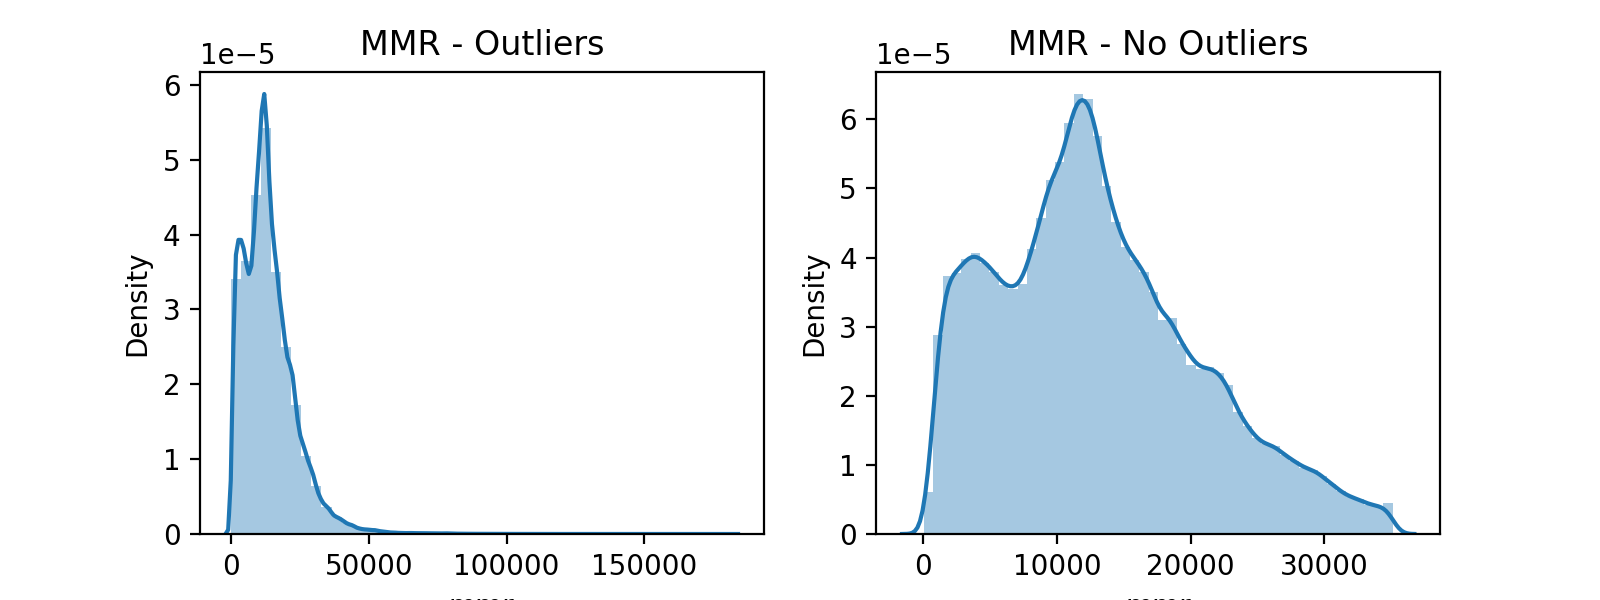

In [ ]:
# Visualisasi hasil penghapusan outlier
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar2.mmr)
plt.title('MMR - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.mmr)
plt.title('MMR - No Outliers')
plt.show()

In [ ]:
# Mengukur skewness sebelum dihandle outlier
print(f"Koefisien Skewness Awal mmr : {round(dfcar2.mmr.skew(), 3)}")

# Mengukur skewness setelah dihandle outlier
print(f"Koefisien Skewness Baru mmr : {round(df_clean.mmr.skew(), 3)}")

Koefisien Skewness Awal mmr : 1.998
Koefisien Skewness Baru mmr : 0.544


## Feature Engineering

### Feature Extraction

Dikarenakan pada dataset terdapat banyak fitur kategorikal, maka kita perlu mengubahnya terlebih dahulu menjadi angka. Namun sebelum itu, kita perlu melakukan fitur ekstraksi (feature extraction) untuk melihat pola-pola tertentu yang bisa menyederhanakan proses perubahan fitur nantinya (feature encoding).

#### Overall
Segmentasi kondisi overall berdasarkan rata-rata `condition` dan `odometer`.

In [ ]:
# Grouping 'condition' dan 'odometer' berdasarkan nilai tengah
df_yearcond = df_clean.groupby(['condition', 'odometer']).agg({'mmr' : ['mean','median']})
df_yearcond.describe()

mmr           
            mean     median
count 482570.000 482570.000
mean   12912.635  12907.897
std     7472.915   7473.601
min       50.000     50.000
25%     7200.000   7200.000
50%    12150.000  12150.000
75%    17600.000  17600.000
max    35100.000  35100.000

In [ ]:
# Fungsi untuk segmentasi kolom 'overall'
def segment(x):
    if x['odometer'] <= 7200:
        segment = 'Poor'
    elif x['odometer'] > 7200 and x['odometer'] <= 12150:
        segment = 'Fair'
    elif x['odometer'] > 12150 and x['odometer'] <= 17600:
        segment = 'Good'
    else:
        segment = 'Very Good'
    return segment

df_clean['Overall'] = df_clean.apply(lambda x: segment(x), axis=1)

#### Made In

Menyederhanakan value pada fitur `make` dengan mengkategorikan merk mobil sesuai asal negara pembuat nya.

In [ ]:
# Segmentasi brand mobil berdasarkan negara pembuat
us_made = ['chevrolet', 'ford', 'buick', 'cadillac', 'jeep', 'dodge', 'chrysler', 'ram', 'scion', 'pontiac', 'saturn', 'mercury', 'hummer', 'gmc', 'gmc truck',
           'oldsmobile', 'ford truck', 'lincoln', 'plymouth', 'airstream']
germany_made = ['bmw', 'audi', 'mercedes-benz', 'porsche', 'smart', 'chev truck', 'volkswagen']
japan_made = ['nissan', 'acura', 'lexus', 'infiniti', 'mitsubishi', 'mazda', 'toyota', 'subaru', 'honda', 'suzuki', 'isuzu', 'mazda tk']
uk_made = ['mini', 'land rover', 'jaguar']
italy_made = ['fiat', 'maserati']
korea_made = ['kia', 'hyundai', 'hyundai tk', 'daewoo']
swedia_made = ['volvo', 'saab']

made_in = []

for maker in df_clean['make']:
    if maker in us_made:
        country = 'US'
    elif maker in germany_made:
        country = 'DEU'
    elif maker in japan_made:
        country = 'JPN'
    elif maker in uk_made:
        country = 'UK'
    elif maker in italy_made:
        country = 'ITA'
    elif maker in korea_made:
        country = 'KOR'
    else:
        country = 'SWE'

    made_in.append(country)

df_clean['made_in'] = made_in

#### Top Make
Segmentasi `make` berdasarkan 11 top brand. Nilai 'Other' adalah untuk brand di luar 11 brand tersebut.

In [ ]:
# Segmentasi top brand
top_make = df_clean.groupby('make')['year'].count().reset_index().sort_values('year', ascending=False)
top_make = top_make.iloc[:11]
top_make.drop('year', axis=1, inplace=True)
top_make['top_make'] = top_make['make']
top_make

,make,top_make
13,ford,ford
7,chevrolet,chevrolet
36,nissan,nissan
48,toyota,toyota
10,dodge,dodge
17,honda,honda
19,hyundai,hyundai
25,kia,kia
8,chrysler,chrysler
3,bmw,bmw


In [ ]:
df_clean = df_clean.merge(top_make, how='left', on='make')
df_clean['top_make'].fillna('Other', inplace=True)
df_clean['top_make'].unique()

array(['kia', 'bmw', 'Other', 'nissan', 'chevrolet', 'ford', 'hyundai',
       'jeep', 'toyota', 'dodge', 'chrysler', 'honda'], dtype=object)

### Feature Selection

Setelah semua fitur menjadi numerik, selanjutnya kita bisa menghapus kolom kategori awal dan kolom yang tidak diperlukan.

In [ ]:
# Menghapus fitur yang kurang relevan
df_clean = df_clean.drop(['make', 'transmission'], axis=1)
df_clean.head(3)

,year,model,trim,body,state,condition,odometer,color,interior,seller,mmr,Overall,made_in,top_make
0,2015,sorento,lx,suv,ca,5.000,16639.000,white,black,kia motors america inc,20500,Good,KOR,kia
1,2015,sorento,lx,suv,ca,5.000,9393.000,white,beige,kia motors america inc,20800,Fair,KOR,kia
2,2014,3 series,328i sulev,sedan,ca,4.500,1331.000,gray,black,financial services remarketing lease,31900,Poor,DEU,bmw


### Feature Encoding

#### One-Hot Encoding  

Melakukan OHE terhadap fitur yang sudah memiliki pola tertentu atau kategori kemiripan, namun bukan merupakan data ordinal.

In [ ]:
df_pre = df_clean.copy()

In [ ]:
# Melakukan One Hot Encoding karena data tidak memiliki urutan
df_pre = pd.get_dummies(df_pre, columns=['Overall', 'made_in', 'top_make'])
df_pre.head(3)

,year,model,trim,body,state,condition,odometer,color,interior,seller,...,top_make_chevrolet,top_make_chrysler,top_make_dodge,top_make_ford,top_make_honda,top_make_hyundai,top_make_jeep,top_make_kia,top_make_nissan,top_make_toyota
0,2015,sorento,lx,suv,ca,5.000,16639.000,white,black,kia motors america inc,...,0,0,0,0,0,0,0,1,0,0
1,2015,sorento,lx,suv,ca,5.000,9393.000,white,beige,kia motors america inc,...,0,0,0,0,0,0,0,1,0,0
2,2014,3 series,328i sulev,sedan,ca,4.500,1331.000,gray,black,financial services remarketing lease,...,0,0,0,0,0,0,0,0,0,0


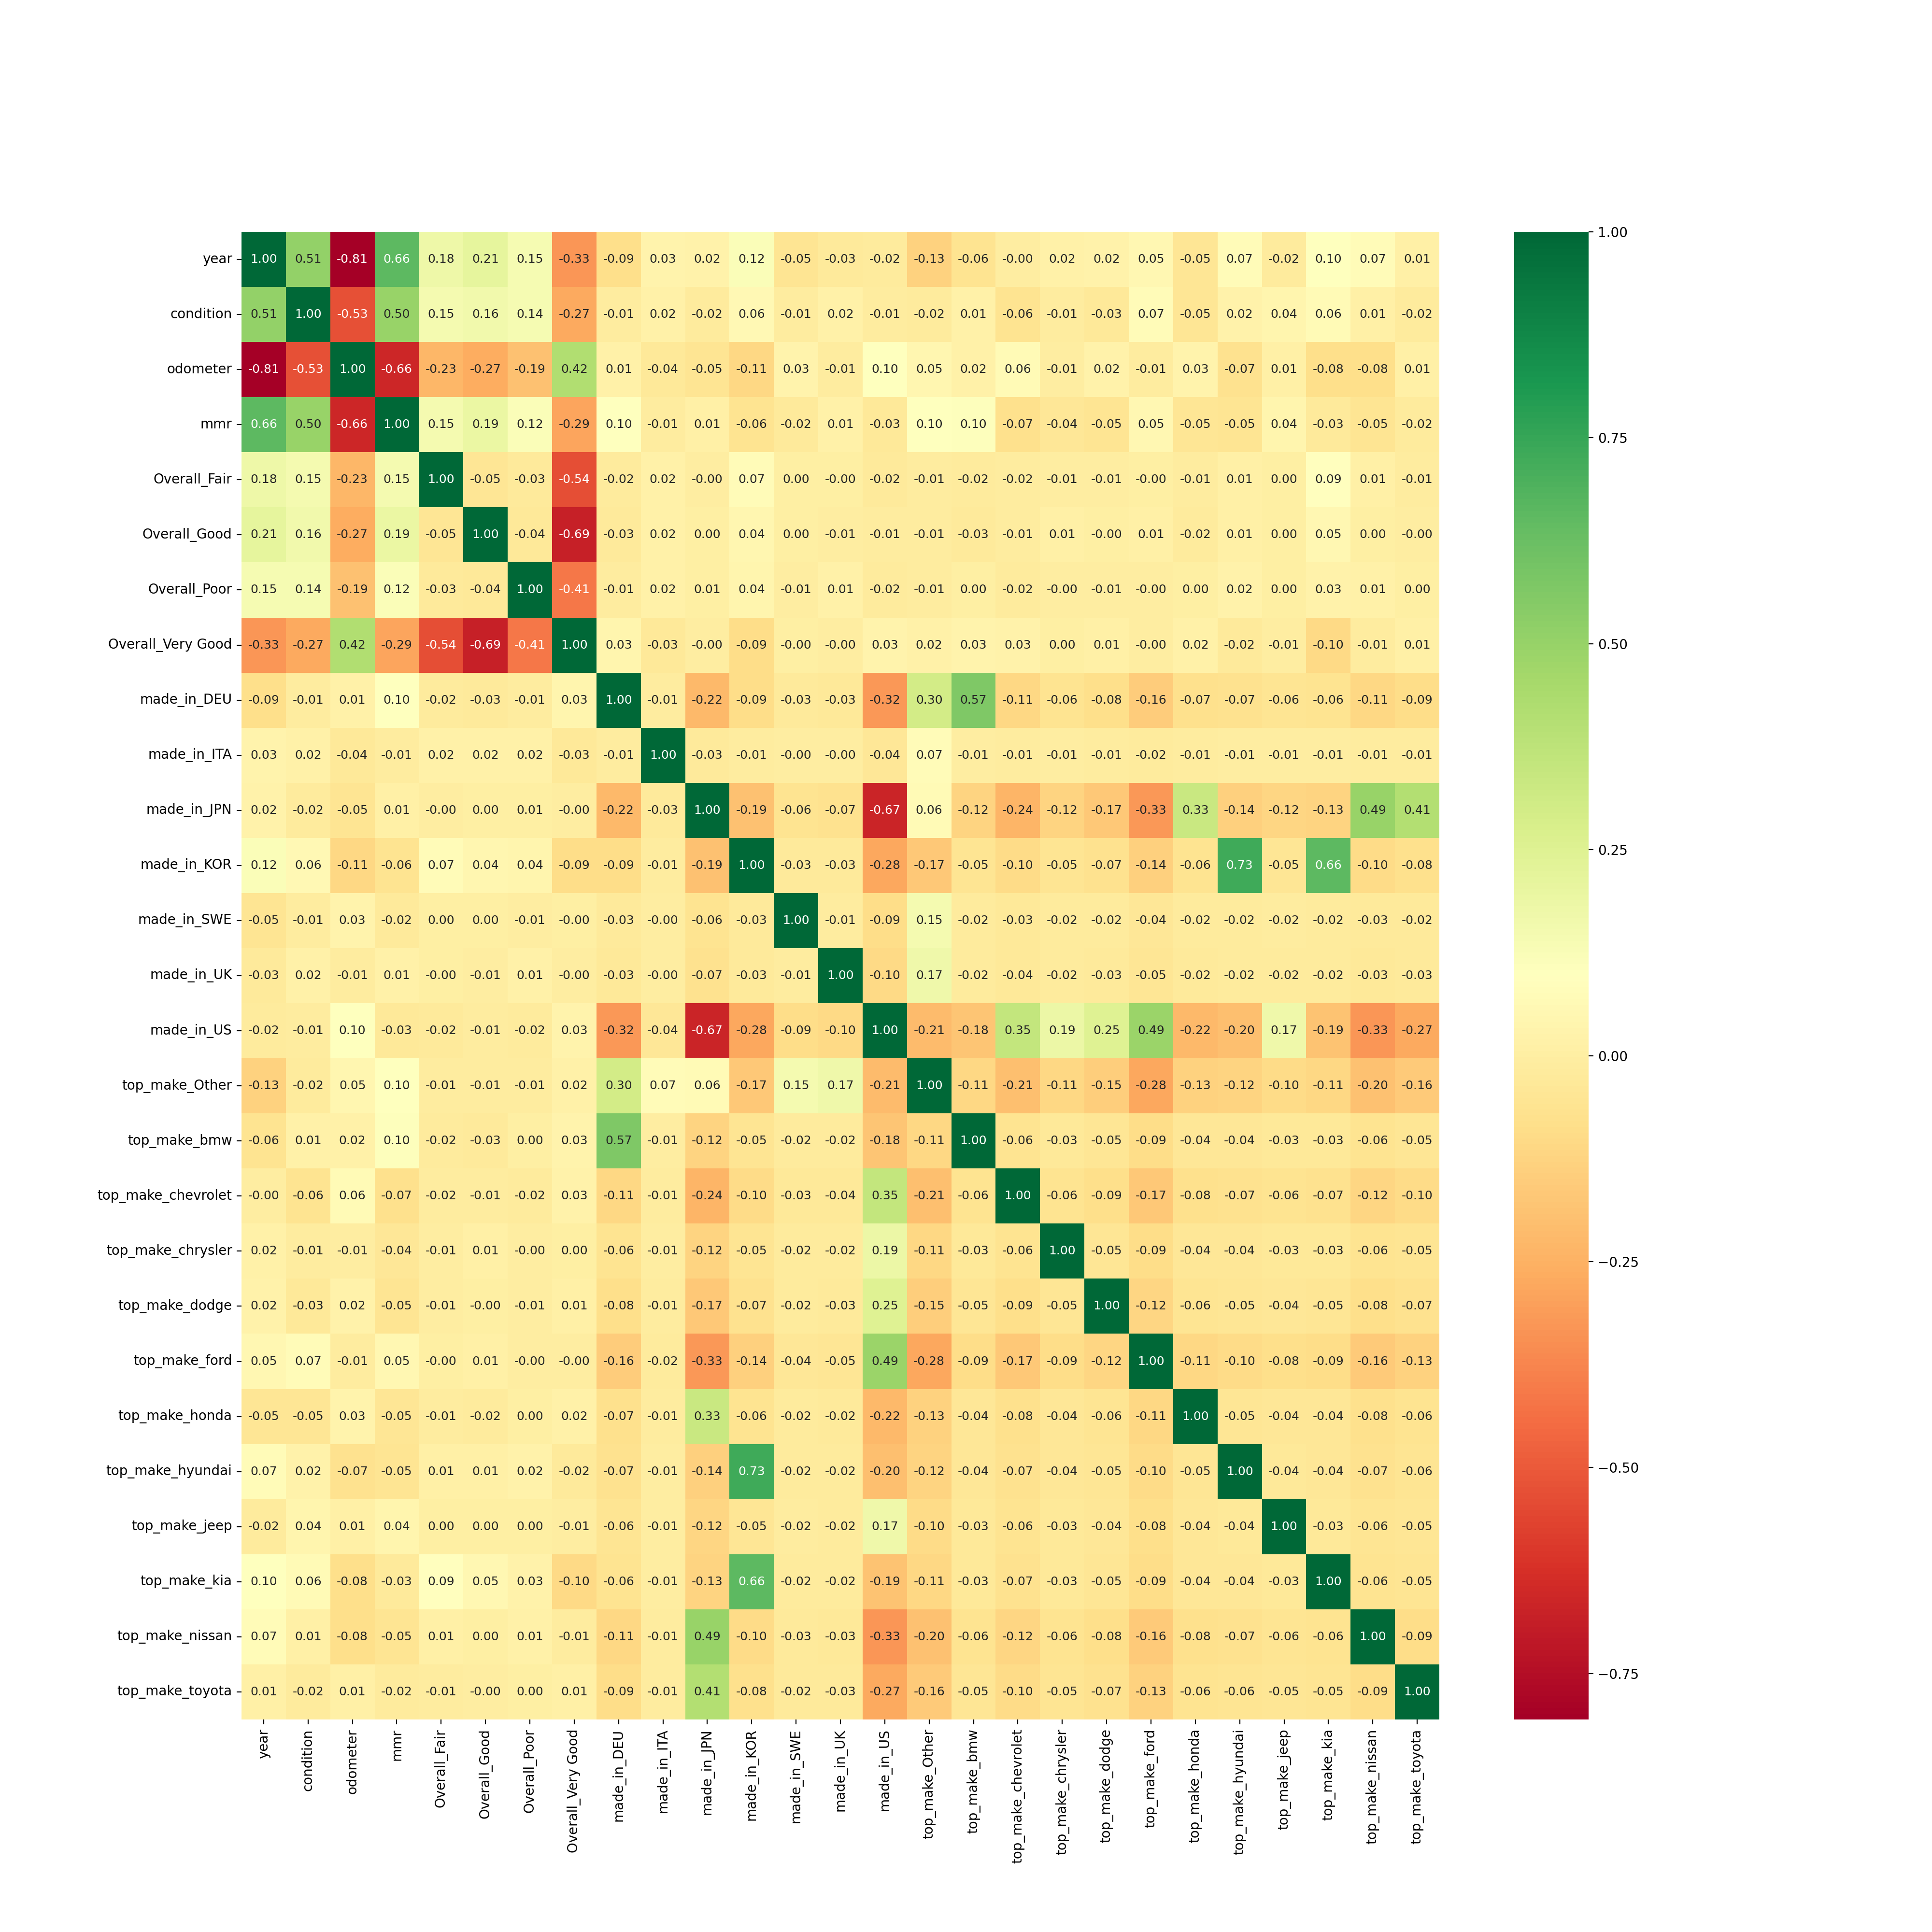

In [ ]:
# Plot korelasi heatmap
corr_matrix = df_pre.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 9}, ax=ax)
plt.show()

#### Target Encoding
Target encoding dilakukan pada beberapa fitur untuk mempertahankan informasi penting yang terkandung dalam fitur kategori, terutama dalam konteks prediksi target.

In [ ]:
pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.5 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

# Melakukan target encoding
cols = ['model', 'trim', 'body', 'state']
target = 'mmr'

encoder = TargetEncoder()
df_pre[cols] = encoder.fit_transform(df_pre[cols], df_pre[target])

#### Count Encoding
Metode ini dilakukan untuk fitur kategori di mana setiap kategori digantikan dengan frekuensi kemunculannya.

In [ ]:
# Count encoding untuk fitur 'seller'
count_encoding_seller = df_pre['seller'].value_counts().to_dict()
df_pre['seller'] = df_pre['seller'].map(count_encoding_seller)

In [ ]:
# Count encoding untuk fitur 'color'
count_encoding_seller = df_pre['color'].value_counts().to_dict()
df_pre['color'] = df_pre['color'].map(count_encoding_seller)

In [ ]:
# Count encoding untuk fitur 'interior'
count_encoding_seller = df_pre['interior'].value_counts().to_dict()
df_pre['interior'] = df_pre['interior'].map(count_encoding_seller)

## Train-Test Split

In [ ]:
df_new = df_pre.copy()

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi fitur data train dan test
features = df_new.select_dtypes(["float64", "int64", "boolean", "uint8"]).columns
x = df_new[features].drop('mmr', axis=1)
y = df_new.mmr

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

### Pre-Processing

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalisasi the data
scaler    = StandardScaler()
n = ['year', 'odometer', 'condition']
xtrain[n] = scaler.fit_transform(xtrain[n])
xtest[n] = scaler.transform(xtest[n])

In [ ]:
xtrain.describe()

,year,model,trim,body,state,condition,odometer,color,interior,seller,...,top_make_chevrolet,top_make_chrysler,top_make_dodge,top_make_ford,top_make_honda,top_make_hyundai,top_make_jeep,top_make_kia,top_make_nissan,top_make_toyota
count,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,...,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000,422244.000
mean,0.000,13095.089,13105.875,13089.124,13091.814,0.000,0.000,82296.618,181267.947,4527.550,...,0.108,0.033,0.057,0.187,0.049,0.041,0.028,0.034,0.101,0.072
std,1.000,4868.135,4465.104,2708.930,1804.508,1.000,1.000,36264.403,77885.505,6103.314,...,0.310,0.178,0.232,0.390,0.216,0.198,0.165,0.182,0.301,0.258
min,-3.312,825.353,1212.431,4901.736,7514.809,-2.640,-1.418,15.000,16.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-0.595,9808.195,10957.675,11370.412,12822.675,-0.795,-0.793,48926.000,170202.000,123.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.492,12575.058,12242.339,11370.412,13271.470,0.181,-0.288,80152.000,170202.000,1633.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.764,16238.533,15207.488,15229.545,14033.186,0.832,0.670,99592.000,248555.000,6069.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.307,33180.335,32474.002,26420.066,17082.222,1.700,2.994,127499.000,248555.000,19687.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


# Modelling and Evaluation

## Modelling

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fungsi untuk menampilkan skor evaluasi model
def eval_regression(model, y_pred, xtrain, xtest, ytrain,  ytest):
    print("MAE: " , mean_absolute_error(ytest, y_pred))
    print("RMSE: " , mean_squared_error(ytest, y_pred, squared=False))
    print('R2 score: ', r2_score(ytest, y_pred))
    print('Coefficients: ', regressor.coef_)
    print('Intercept: ', regressor.intercept_)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Trainin model linear regression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
# Prediksi target
y_pred = regressor.predict(xtest)

# Menampilkan skor evaluasi model linear regression
eval_regression(regressor, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2468.738886308443
RMSE:  3340.305301190921
R2 score:  0.8068971312419558
Coefficients:  [ 2.06677426e+03  4.79655556e-01  3.70676303e-01  3.79883087e-01
  1.18369415e-01  3.98138221e+02 -2.36723593e+03  3.12814470e-03
 -1.49719596e-03 -6.24261183e-02  5.02102915e+01  2.84025360e+02
 -2.66670624e+01 -3.07568589e+02  9.30405569e+02 -2.93142561e+03
  4.00449147e+02 -2.83667871e+03  1.78713769e+03  1.06328034e+03
  1.58683157e+03  5.42698428e+02  1.40855093e+03 -8.31644052e+02
 -1.44227461e+03 -1.35196823e+03 -1.52048951e+03  9.76061514e+02
  2.05889578e+03 -1.58437724e+03  1.54886486e+03 -2.50627743e+02
  4.46309871e+02]
Intercept:  -4656.97325486344


### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# Training model lasso regression
lasso = Lasso(alpha=0.1, fit_intercept=True)
lasso.fit(xtrain, ytrain)

Lasso(alpha=0.1)

In [ ]:
# Prediksi target
y_pred = lasso.predict(xtest)

# Menampilkan skor evaluasi model lasso regression
eval_regression(lasso, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2468.790584640927
RMSE:  3340.33560087233
R2 score:  0.8068936279801807
Coefficients:  [ 2.06677426e+03  4.79655556e-01  3.70676303e-01  3.79883087e-01
  1.18369415e-01  3.98138221e+02 -2.36723593e+03  3.12814470e-03
 -1.49719596e-03 -6.24261183e-02  5.02102915e+01  2.84025360e+02
 -2.66670624e+01 -3.07568589e+02  9.30405569e+02 -2.93142561e+03
  4.00449147e+02 -2.83667871e+03  1.78713769e+03  1.06328034e+03
  1.58683157e+03  5.42698428e+02  1.40855093e+03 -8.31644052e+02
 -1.44227461e+03 -1.35196823e+03 -1.52048951e+03  9.76061514e+02
  2.05889578e+03 -1.58437724e+03  1.54886486e+03 -2.50627743e+02
  4.46309871e+02]
Intercept:  -4656.97325486344


### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Training model ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(xtrain, ytrain)

Ridge()

In [ ]:
# Prediksi target
y_pred = ridge.predict(xtest)

# Menampilkan skor evaluasi model ridge regression
eval_regression(ridge, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2468.751038282878
RMSE:  3340.3150323384825
R2 score:  0.8068960061260888
Coefficients:  [ 2.06677426e+03  4.79655556e-01  3.70676303e-01  3.79883087e-01
  1.18369415e-01  3.98138221e+02 -2.36723593e+03  3.12814470e-03
 -1.49719596e-03 -6.24261183e-02  5.02102915e+01  2.84025360e+02
 -2.66670624e+01 -3.07568589e+02  9.30405569e+02 -2.93142561e+03
  4.00449147e+02 -2.83667871e+03  1.78713769e+03  1.06328034e+03
  1.58683157e+03  5.42698428e+02  1.40855093e+03 -8.31644052e+02
 -1.44227461e+03 -1.35196823e+03 -1.52048951e+03  9.76061514e+02
  2.05889578e+03 -1.58437724e+03  1.54886486e+03 -2.50627743e+02
  4.46309871e+02]
Intercept:  -4656.97325486344


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Training model random forest
rf = RandomForestRegressor(random_state=104, verbose=False)
rf.fit(xtrain, ytrain)

RandomForestRegressor(random_state=104, verbose=False)

In [ ]:
# Prediksi target
ytrain_pred = rf.predict(xtrain)
ytest_pred = rf.predict(xtest)

In [ ]:
# Menampilkan skor evaluasi model random forest
def evaluasi(model, ytrain_pred, ytest_pred, xtrain, xtest, ytrain,  ytest):
    print("MAE train: " , mean_absolute_error(ytrain, ytrain_pred))
    print("MAE test: " , mean_absolute_error(ytest, ytest_pred))
    print("RMSE train: " , mean_squared_error(ytrain, ytrain_pred, squared=False))
    print("RMSE test: " , mean_squared_error(ytest, ytest_pred, squared=False))
    print('R2 score train: ', r2_score(ytrain, ytrain_pred))
    print('R2 score test: ', r2_score(ytest, ytest_pred))

evaluasi(rf, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  249.24368197061415
MAE test:  675.3143389666736
RMSE train:  451.59455435411223
RMSE test:  1223.7941125480165
R2 score train:  0.9964442452180161
R2 score test:  0.9740801120792703


### CatBoost Regressor

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

# Training model catboost
catboost = CatBoostRegressor(verbose=False)
catboost.fit(xtrain, ytrain)

In [ ]:
# Prediksi target
ytrain_pred = catboost.predict(xtrain)
ytest_pred = catboost.predict(xtest)

# Menampilkan skor evaluasi model catboost
evaluasi(catboost, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  918.5333764968341
MAE test:  930.3384890568701
RMSE train:  1439.3781961134798
RMSE test:  1470.3113808830235
R2 score train:  0.9638769635308235
R2 score test:  0.9625859228072585


### XGBoost

In [ ]:
import xgboost as xgb

# Training model xgboost
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Prediksi target
ytrain_pred = xgb_regressor.predict(xtrain)
ytest_pred = xgb_regressor.predict(xtest)

# Menampilkan skor evaluasi model xgboost
evaluasi(xgb_regressor, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  976.6041523871259
MAE test:  1000.2500079120172
RMSE train:  1500.1049592424351
RMSE test:  1552.3379414399467
R2 score train:  0.9607646343907252
R2 score test:  0.9582949213059464


Dari keseluruhan percobaan model, model yang terbaik adalah model **Random Forest** karena memiliki score R2 paling tinggi serta MAE dan RMSE yang paling kecil diantara model lainnya.

## Evaluation

### Feature Importance

Text(0.5, 1.0, 'Feature Importance Score')

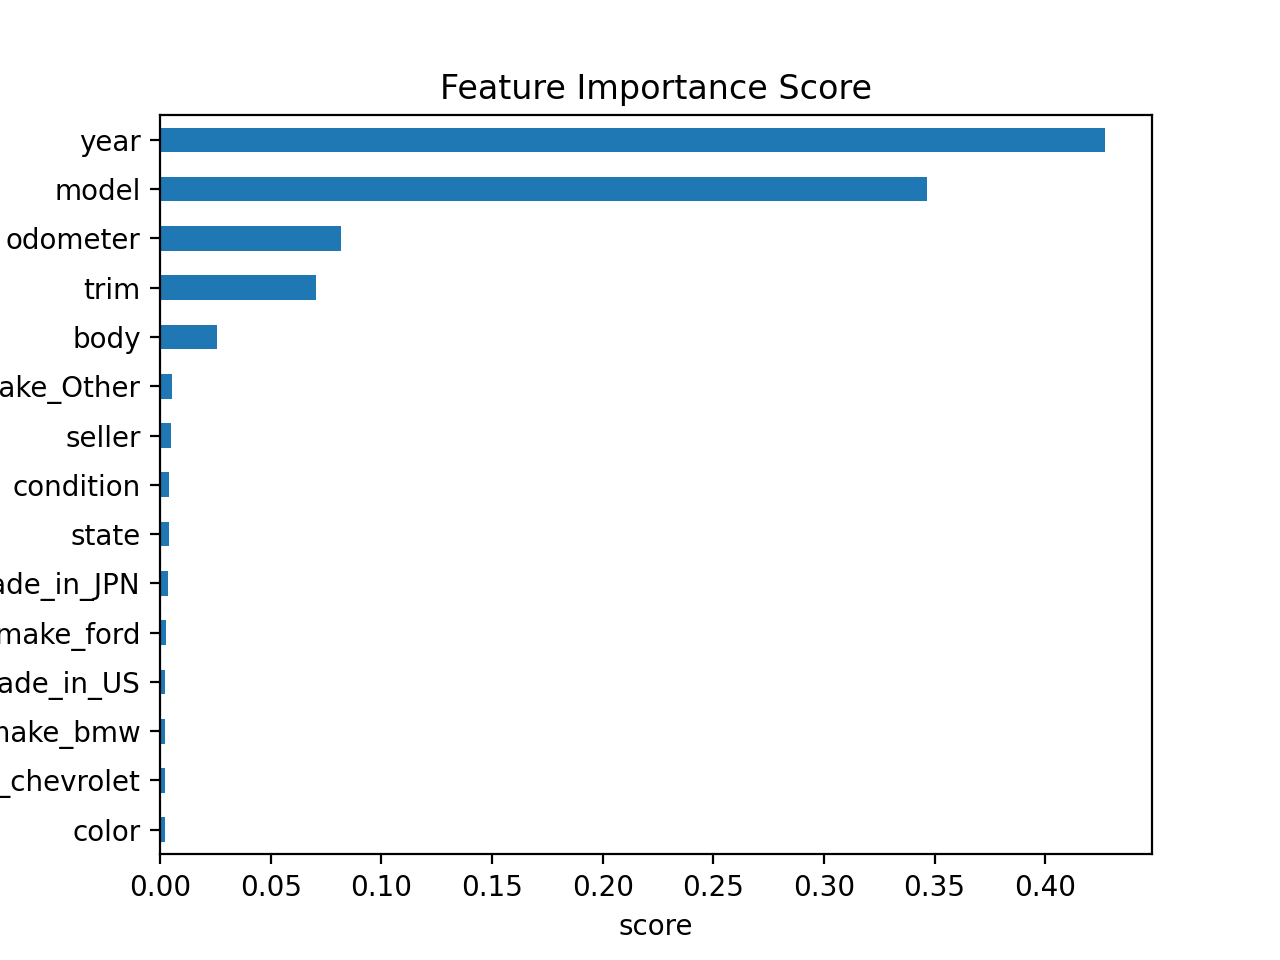

In [ ]:
# Menampilkan grafik feature importance
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
ax = feat_importances.nlargest(15).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('Feature Importance Score')

### SHAP Value

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.5 MB/s eta 0:00:00


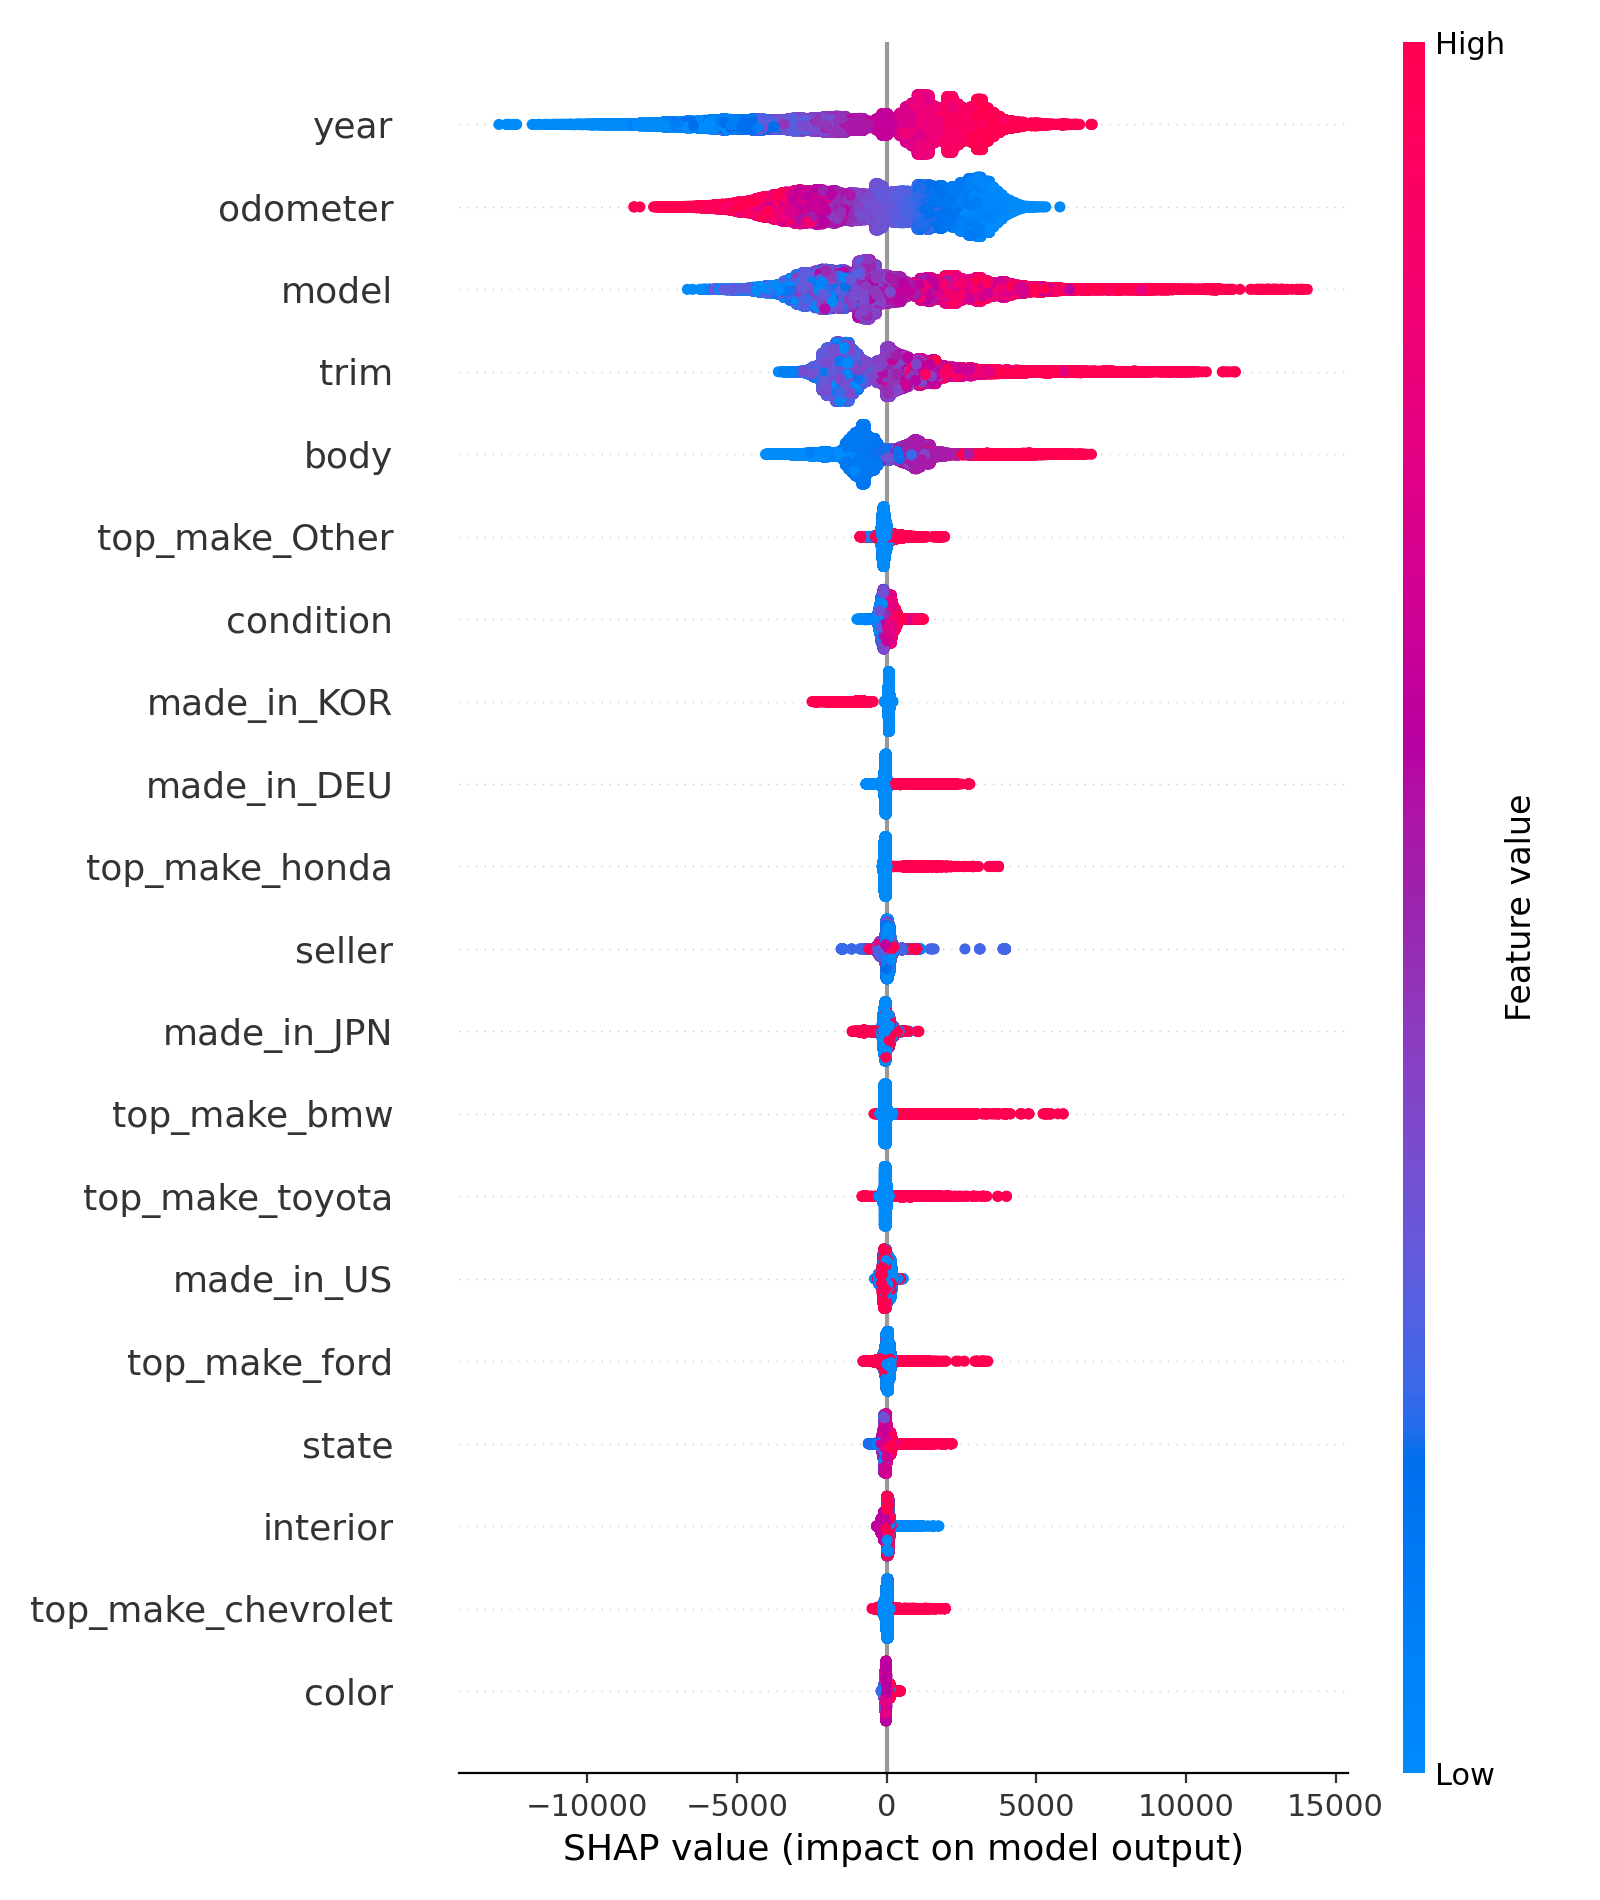

In [ ]:
import shap

# Menampilkan summary shap
explainer = shap.TreeExplainer(catboost)
shap_values = explainer.shap_values(xtest)
shap.summary_plot(shap_values, xtest)

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate

# Melakukan validasi silang
SEED = 101
np.random.seed(SEED)

model_cv = RandomForestRegressor(verbose=False)
scores = cross_validate(model_cv, xtrain, ytrain, cv = 5, return_train_score=False)
media = scores['test_score'].mean()
std_dev = scores['test_score'].std()
print("Accuracy with cross validation, 5 = [%.2f%%, %.2f%%]" % ((media - 2 * std_dev)*100, (media + 2 * std_dev) * 100))

Accuracy with cross validation, 5 = [97.22%, 97.42%]


### New Selling Price

In [ ]:
# Real Price X Predict Price
df_pred = pd.DataFrame(columns=['mmr', 'sellingprice_predicted'])
df_pred['mmr'] = ytest
rf_model = RandomForestRegressor(verbose=False)
rf_model.fit(xtrain, ytrain)
df_pred['sellingprice_predicted'] = rf_model.predict(xtest)
df_pred

,mmr,sellingprice_predicted
262193,8775,8873.500
392466,8100,7615.000
524832,20300,19924.500
286417,2500,2704.000
323786,16050,15889.500
...,...,...
274895,14800,14538.000
382225,14700,18652.500
495101,11600,12163.000
175086,5425,5221.000


**Menambahkan hasil prediksi Selling Price ke Original Dataset**

In [ ]:
y_df = pd.DataFrame(data = df_pred, columns = ['sellingprice_predicted'], index = xtest.index.copy())
df_out = pd.merge(dfcar, y_df, how = 'left', left_index = True, right_index = True)
df_out.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sellingprice_predicted
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.000,16639.000,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.000,9393.000,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.500,1331.000,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),31075.000
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.100,14282.000,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.300,2641.000,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),NaN


In [ ]:
df_compare = df_out.copy()

# Menghapus selling price predicted yang NaN (data yang tidak digunakan saat modelling)
df_compare.dropna(subset = ['sellingprice_predicted'], inplace=True)

# Membuat kolom baru is below mmr untuk perbandingan
df_compare['is_below_mmr'] = df_compare.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)
df_compare

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sellingprice_predicted,is_below_mmr
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.500,1331.000,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),31075.000,1
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,3.400,14943.000,black,black,the hertz corporation,69000,65000,Wed Dec 17 2014 12:30:00 GMT-0800 (PST),31361.000,1
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.000,28617.000,black,black,enterprise vehicle exchange / tra / rental / t...,11900,9800,Tue Dec 16 2014 13:00:00 GMT-0800 (PST),25515.000,1
24,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c57ed169262,ca,3.800,10736.000,black,black,the hertz corporation,67000,65000,Tue Jan 06 2015 12:30:00 GMT-0800 (PST),20610.000,1
26,2015,Volvo,XC70,T6,Wagon,automatic,yv4902nb3f1198103,ca,4.200,16506.000,brown,brown,volvo na rep/world omni,32100,32500,Thu Feb 26 2015 04:30:00 GMT-0800 (PST),15068.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527778,2008,Honda,Civic,EX-L,coupe,automatic,2hgfg12988h532869,fl,2.000,112319.000,gray,tan,onemain rem/minas car group,6675,6200,Fri Jun 19 2015 03:20:00 GMT-0700 (PDT),22193.000,1
527781,2008,Jeep,Wrangler,Unlimited Sahara,suv,NaN,1j4ga59168l648211,fl,3.400,102653.000,silver,gray,autobuy,17250,19000,Thu Jun 11 2015 02:10:00 GMT-0700 (PDT),10014.000,0
527792,2008,Jeep,Liberty,Limited Edition,suv,automatic,1j8gn58kx8w174565,mi,4.100,79975.000,silver,gray,automobiles paille inc,10850,10000,Tue Jun 30 2015 06:30:00 GMT-0700 (PDT),11630.000,1
527804,2008,Jeep,Liberty,Sport,suv,automatic,1j8gp28k88w170782,tx,3.300,54575.000,white,beige,auto mall 59,9275,9600,Thu Jun 18 2015 03:30:00 GMT-0700 (PDT),15804.500,0


Data diatas adalah sama seperti yang digunakan saat pemodelan (105562 baris data) yang sudah ditambahkan selling price hasil prediksi.

**Membuat Perbandingan**

Menggunakan Dataset Asli

In [ ]:
# Grouping selling price relatif terhadap MMR sebelum modelling
df_compare['is_below_mmr'] = df_compare.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)

transaction = df_compare.groupby('is_below_mmr').agg({'mmr':'count'}).rename({'mmr':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

,total_transaction,percentage
is_below_mmr,,
0,51136,48.440
1,54426,51.560


In [ ]:
# Menghitung rata-rata selling price dan kondisi relatif terhadap MMR
def displayMeanSP(df):
    spAboveMMR=[]
    spBelowMMR=[]

    for index, row in df.iterrows():
      if row['is_below_mmr'] == 1:
        spBelowMMR.append(row['sellingprice'])
      else:
        spAboveMMR.append(row['sellingprice'])

    print(f'Mean of Selling Price above MMR = {sum(spAboveMMR)/len(spAboveMMR)}')
    print(f'Mean of Selling Price below MMR = {sum(spBelowMMR)/len(spBelowMMR)}')

displayMeanSP(df_compare)

Mean of Selling Price above MMR = 14816.63600985607
Mean of Selling Price below MMR = 12506.370062102671


Menggunakan Hasil Modelling

In [ ]:
# Grouping selling price relatif terhadap MMR setelah modelling
df_pred['is_below_mmr'] = df_pred.apply(lambda x: 1 if x.sellingprice_predicted < x.mmr else 0, axis=1)

transaction = df_pred.groupby('is_below_mmr').agg({'mmr':'count'}).rename({'mmr':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

,total_transaction,percentage
is_below_mmr,,
0,54688,51.810
1,50874,48.190


In [ ]:
# Menghitung rata-rata selling price dan kondisi relatif terhadap MMR
def displayMeanSP(df):
    spAboveMMR=[]
    spBelowMMR=[]

    for index, row in df.iterrows():
      if row['is_below_mmr'] == 1:
        spBelowMMR.append(row['sellingprice_predicted'])
      else:
        spAboveMMR.append(row['sellingprice_predicted'])

    print(f'Mean of Selling Price above MMR = {sum(spAboveMMR)/len(spAboveMMR)}')
    print(f'Mean of Selling Price below MMR = {sum(spBelowMMR)/len(spBelowMMR)}')

displayMeanSP(df_pred)

Mean of Selling Price above MMR = 12765.349953371855
Mean of Selling Price below MMR = 13428.801421158156


Dengan sample sebesar 20%, prediksi harga yang dibuat menunjukkan bahwa persentase harga dibawah mmr adalah 48.19% dimana angka ini menunjukkan penurunan sekitar 3% dari data awal dan harga diatas mmr juga 3% mengalami kenaikan dibanding data awal.

# Kesimpulan

Setelah dilakukan pemodelan, rata-rata harga dibawah mmr adalah sebesar 13422. Jika dibandingkan dengan rata-rata harga mobil yang dijual dibawah mmr sebelumnya yaitu 12506, kita bisa menarik kesimpulan bahwa harga mobil direkomendasikan dijual $916 (6.8%) lebih tinggi, sehingga seller bisa mendapatkan keuntungan yang lebih banyak.

Begitu pula dengan rata-rata mobil yang dijual diatas mmr yaitu 12775 jika dibandingkan dengan yang sebelumnya yaitu 14816. Kita bisa merekomendasikan bahwa harga mobil bisa dijual $2041 (13.7%) lebih rendah agar harga tidak terlalu terlampau mahal.